# **1. Perkenalan Dataset**


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [2]:
path = 'synthetic_beverage_sales_data.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       4999 non-null   object 
 1   Customer_ID    4999 non-null   object 
 2   Customer_Type  4999 non-null   object 
 3   Product        4999 non-null   object 
 4   Category       4999 non-null   object 
 5   Unit_Price     4999 non-null   float64
 6   Quantity       4999 non-null   int64  
 7   Discount       4999 non-null   float64
 8   Total_Price    4999 non-null   float64
 9   Region         4999 non-null   object 
 10  Order_Date     4999 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 429.7+ KB


In [5]:
df.describe(include="all")

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,4999,4999,4999,4999,4999,4999.000000,4999.000000,4999.000000,4999.000000,4999,4999
unique,1684,1537,2,47,4,NaN,NaN,NaN,NaN,16,856
top,ORD6,CUS9786,B2C,Mango Juice,Soft Drinks,NaN,NaN,NaN,NaN,Hamburg,2022-04-27
freq,5,12,3305,199,1317,NaN,NaN,NaN,NaN,408,22
mean,NaN,NaN,NaN,NaN,NaN,5.760622,22.413483,0.028186,117.647552,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.712435,26.440948,0.044187,456.724314,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.320000,1.000000,0.000000,0.400000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.070000,6.000000,0.000000,8.520000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.840000,11.000000,0.000000,20.930000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.210000,27.000000,0.050000,66.580000,NaN,NaN


In [6]:
print("\nCek Missing Values:")
print(df.isnull().sum())


Cek Missing Values:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [7]:
print("\nInfo Data:")
print(df.info())


Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       4999 non-null   object 
 1   Customer_ID    4999 non-null   object 
 2   Customer_Type  4999 non-null   object 
 3   Product        4999 non-null   object 
 4   Category       4999 non-null   object 
 5   Unit_Price     4999 non-null   float64
 6   Quantity       4999 non-null   int64  
 7   Discount       4999 non-null   float64
 8   Total_Price    4999 non-null   float64
 9   Region         4999 non-null   object 
 10  Order_Date     4999 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 429.7+ KB
None


In [8]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
        Unit_Price     Quantity     Discount   Total_Price
count  4999.000000  4999.000000  4999.000000   4999.000000
mean      5.760622    22.413483     0.028186    117.647552
std      14.712435    26.440948     0.044187    456.724314
min       0.320000     1.000000     0.000000      0.400000
25%       1.070000     6.000000     0.000000      8.520000
50%       1.840000    11.000000     0.000000     20.930000
75%       3.210000    27.000000     0.050000     66.580000
max     132.090000   100.000000     0.150000  10112.850000


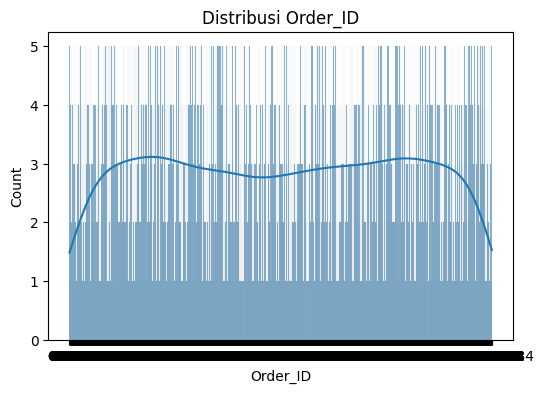

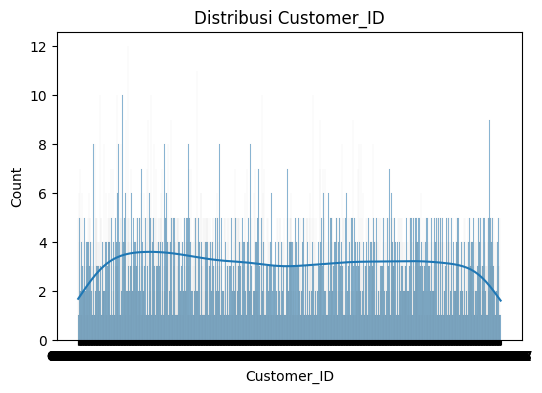

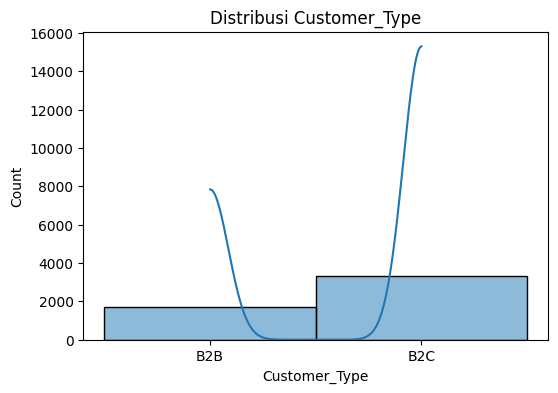

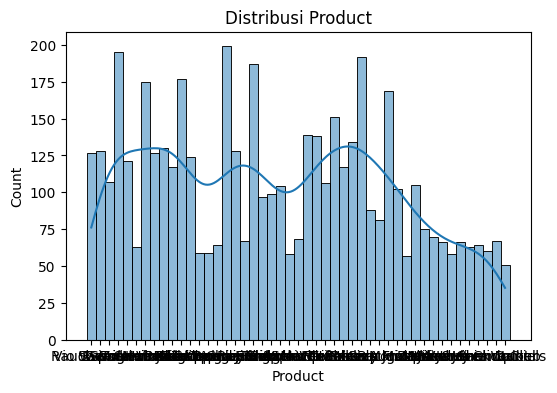

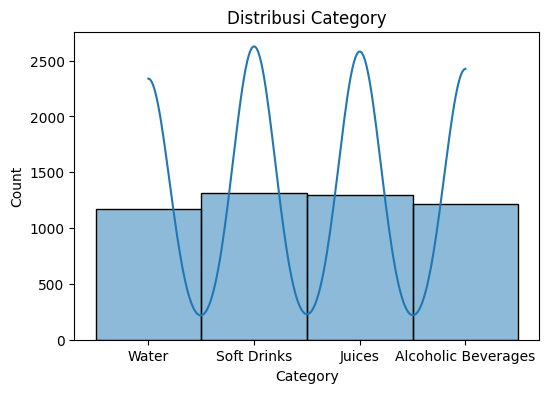

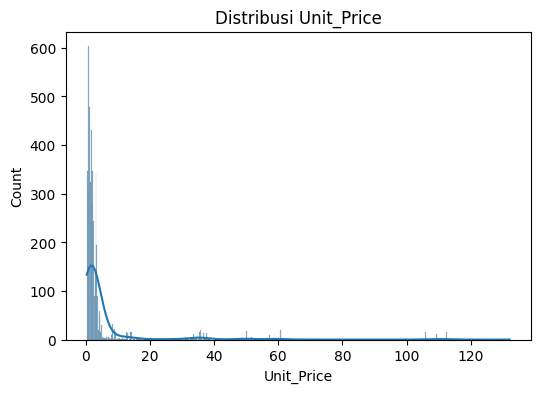

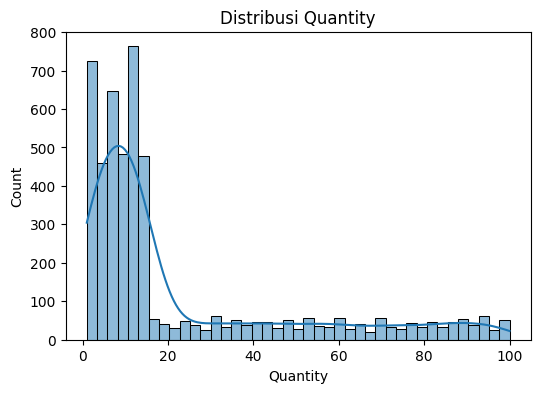

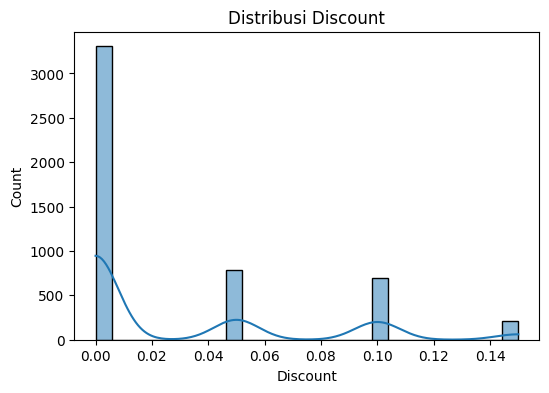

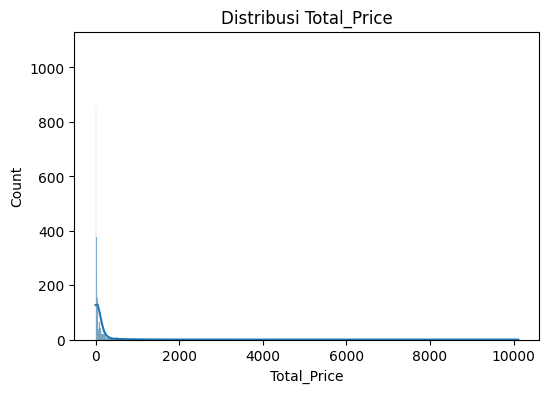

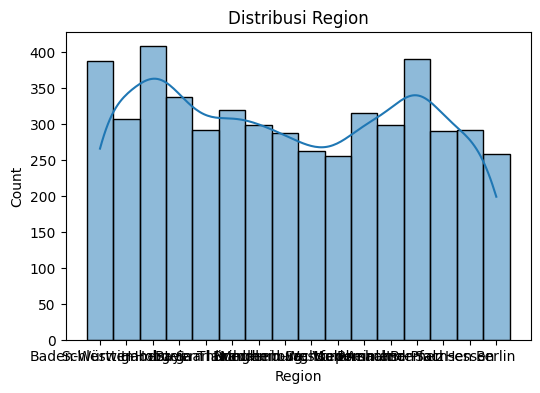

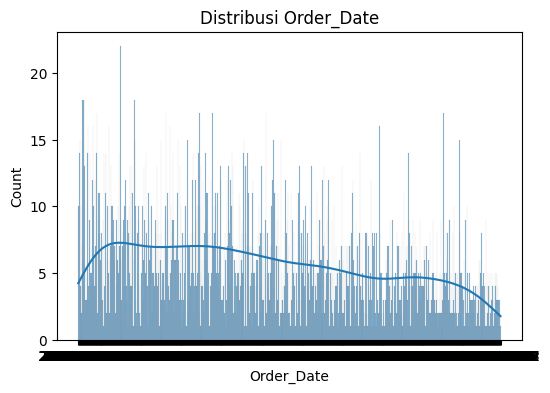

In [9]:
# Visualisasi distribusi
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

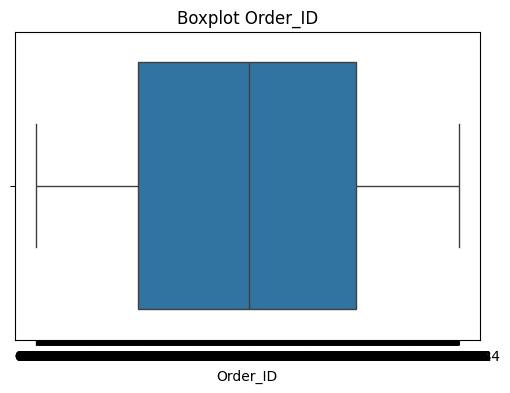

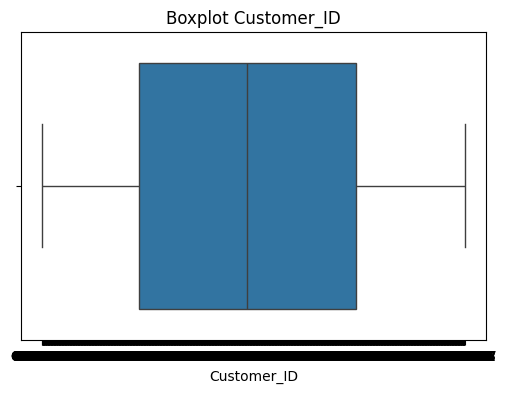

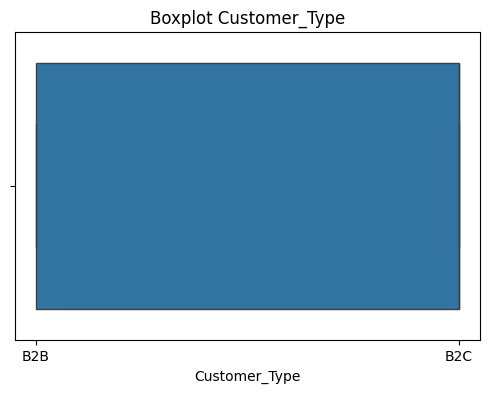

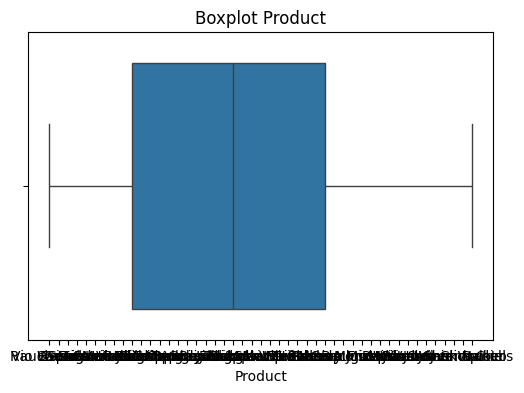

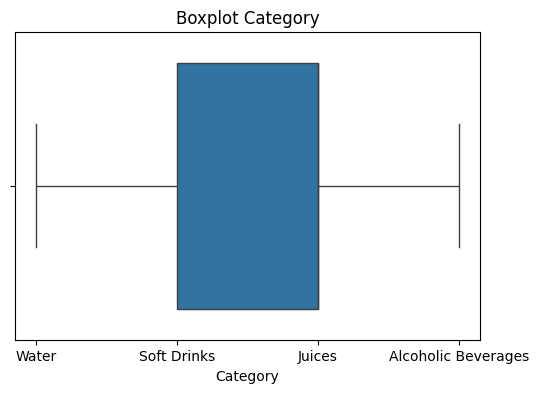

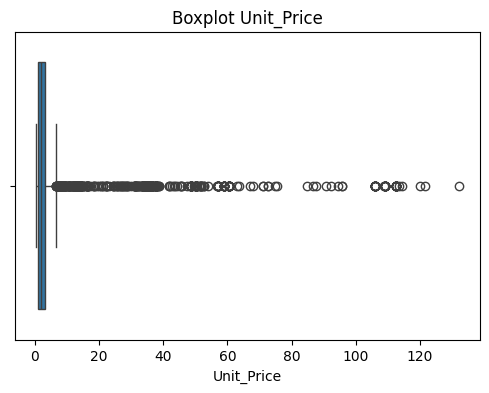

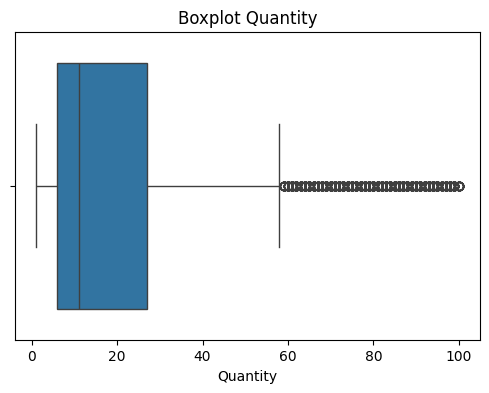

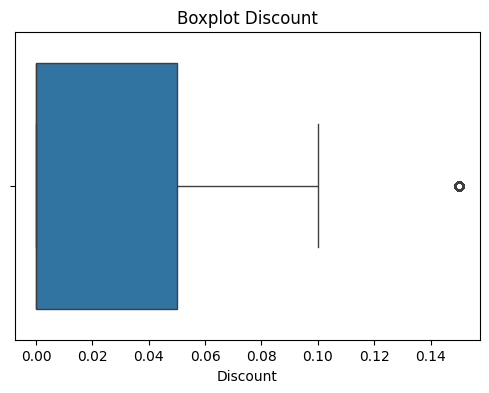

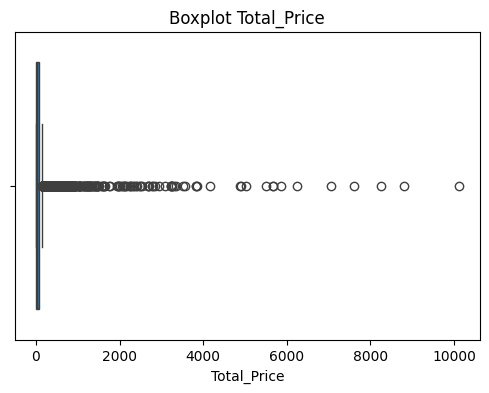

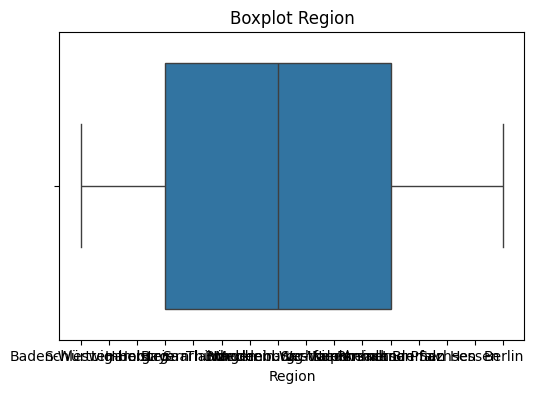

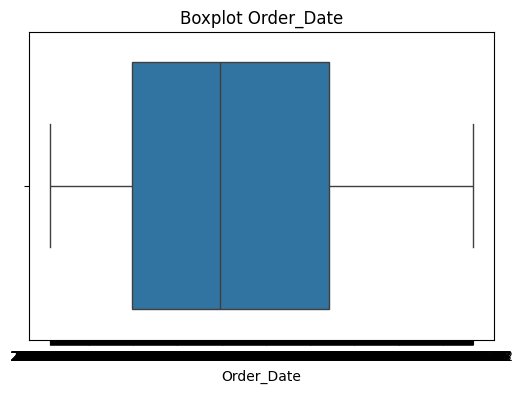

In [10]:
# Boxplot untuk melihat outlier
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

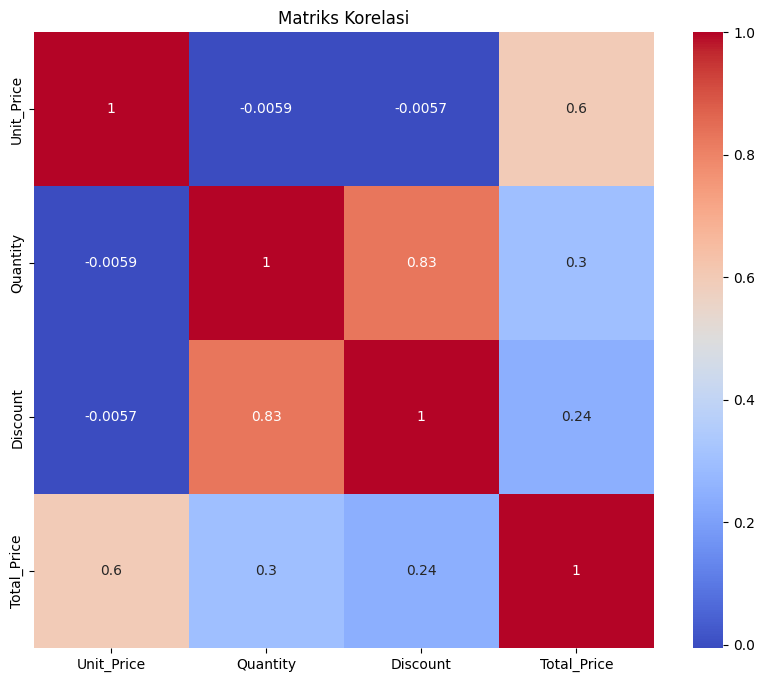

In [11]:
# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number])

# Matriks korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

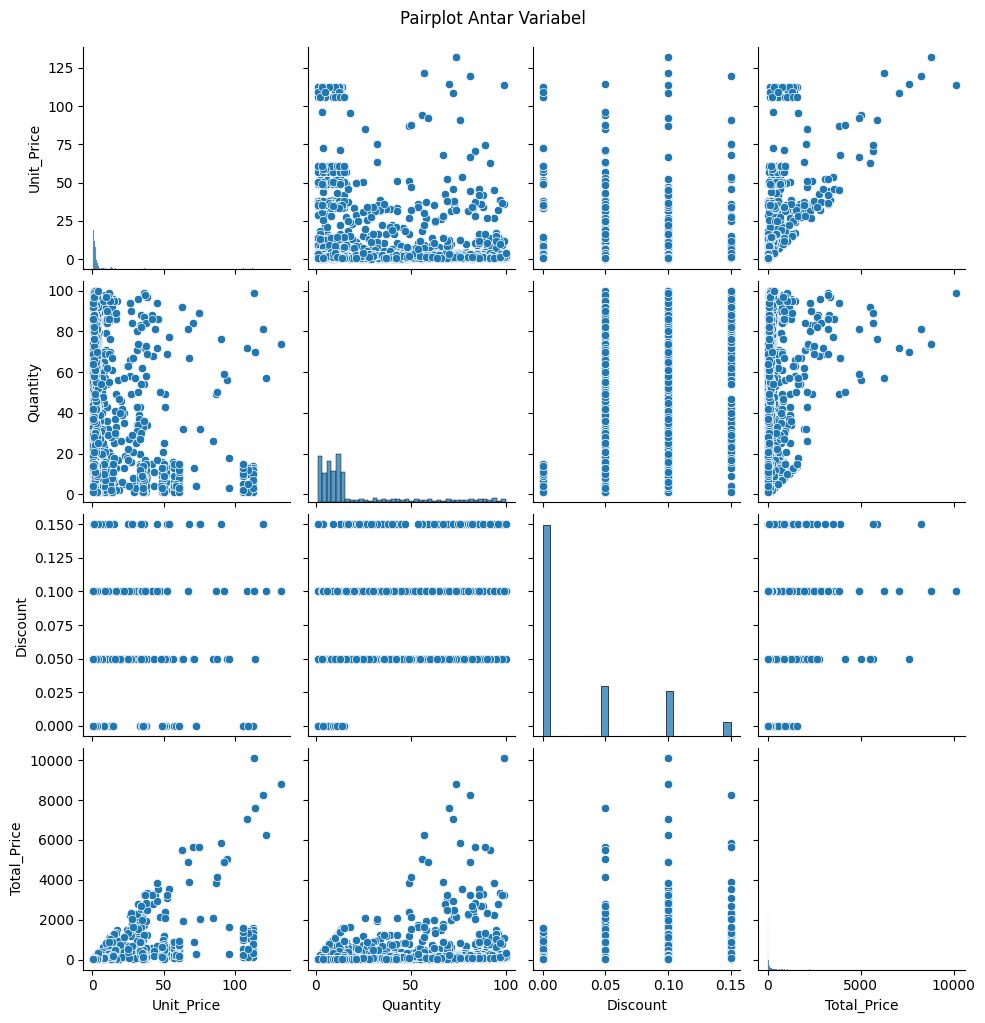

In [12]:
# Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot Antar Variabel', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
# Menghapus Missing Values
df = df.dropna()

In [14]:
# Menghapus Data Duplikat
df = df.drop_duplicates()

In [15]:
# Encoding Data Kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
binning_col = 'Price'  # Ganti sesuai kolom numerik di dataset
if binning_col in df.columns:
    df[binning_col + '_binned'] = pd.cut(df[binning_col], bins=[0, 10, 20, 50, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

In [17]:
# Deteksi dan Penanganan Outlier (opsional, misal menggunakan IQR)
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [18]:
# Normalisasi/Standarisasi hanya kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [19]:
# a. Pilih algoritma clustering yang sesuai (K-Means digunakan di sini)
from sklearn.cluster import KMeans

# b. Tentukan jumlah cluster berdasarkan hasil metode Elbow atau Silhouette
optimal_k = 3  # Ini bisa disesuaikan berdasarkan grafik Elbow dan Silhouette


In [20]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print(f"Model Clustering dengan {optimal_k} cluster telah dibangun.")

# c. Menampilkan pusat cluster (centroids)
centroids = kmeans.cluster_centers_
print("Pusat Cluster (Centroids):")
print(centroids)

Model Clustering dengan 3 cluster telah dibangun.
Pusat Cluster (Centroids):
[[ 0.03701973  0.00723607  0.         -0.17041158 -0.68304302  0.74812298
   0.71105608  0.          1.24754656  0.00715122  0.0343535 ]
 [ 0.01984818 -0.06611334  0.         -0.50464894 -0.42976497  0.23870839
  -0.91240389  0.         -0.59398881  0.01266674  0.04791744]
 [-0.04673592  0.0524345   0.          0.5786843   0.91821696 -0.80162011
   0.24027656  0.         -0.46409251 -0.01679779 -0.06931869]]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

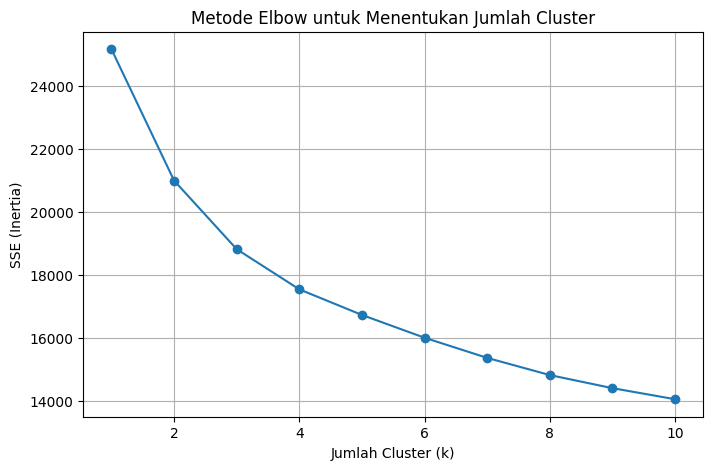

In [21]:
# b. Evaluasi Model Clustering

# 1. Metode Elbow untuk Menentukan Jumlah Cluster
sse = []  # Sum of squared errors (SSE)
range_k = range(1, 11)  # Rentang jumlah cluster yang akan diuji

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_k, sse, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

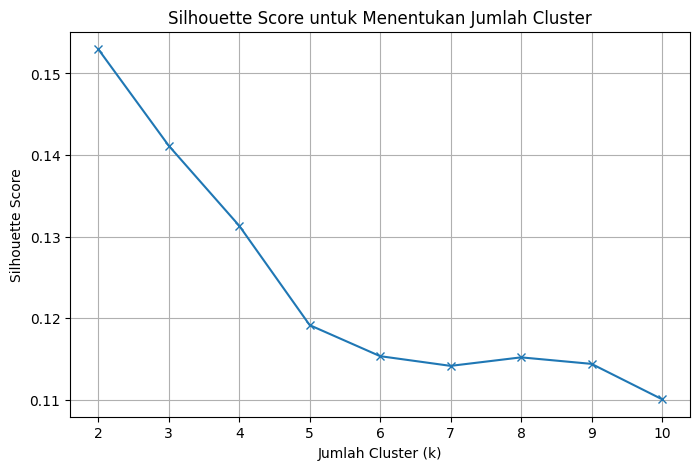

In [22]:
# 2. Metode Silhouette Score untuk Menentukan Jumlah Cluster
silhouette_scores = []
range_k2 = range(2, 11)  # Dimulai dari 2 karena silhouette score membutuhkan setidaknya 2 cluster

for k in range_k2:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range_k2, silhouette_scores, marker='x')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [23]:
# 3. Menampilkan hasil terbaik berdasarkan Silhouette Score
best_k = range_k2[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {best_k}")

Jumlah cluster optimal berdasarkan Silhouette Score: 2


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [24]:
# c. Feature Selection (Opsional)

# 1. Menghitung Korelasi antar Fitur untuk memilih fitur yang paling relevan
corr_matrix = df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']].corr()

# Menampilkan fitur yang berkorelasi tinggi (lebih dari 0.9 atau -0.9)
high_corr_var = np.where(abs(corr_matrix) > 0.9)
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y])
                   for x, y in zip(*high_corr_var) if x != y and x < y]

print("Fitur dengan korelasi tinggi:")
print(high_corr_pairs)

Fitur dengan korelasi tinggi:
[]


In [25]:
# 2. Menghapus fitur yang sangat berkorelasi (contoh: jika ada pasangan fitur yang lebih dari 0.9)
# Misalnya kita akan menghapus 'Unit_Price' karena sangat berkorelasi dengan 'Total_Price'
columns_to_drop = ['Unit_Price']  # Ganti dengan nama kolom yang ingin di-drop
df_selected = df.drop(columns=columns_to_drop)

In [26]:
# 3. Lakukan Pemodelan Ulang dengan Fitur yang Terpilih
# Pilih hanya kolom numerik yang tersisa setelah feature selection
numeric_cols_selected = df_selected[['Quantity', 'Discount', 'Total_Price']]

# Normalisasi/standarisasi data
df_selected_scaled = scaler.fit_transform(numeric_cols_selected)

# Lakukan clustering dengan model yang sama (misalnya KMeans)
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42)
df_selected['Cluster'] = kmeans_selected.fit_predict(df_selected_scaled)

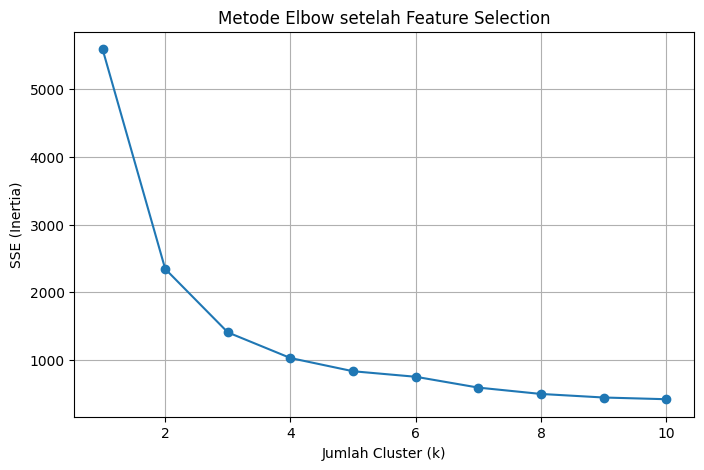

In [27]:
# 4. Evaluasi Model setelah Feature Selection
# Evaluasi menggunakan Elbow Method dan Silhouette Score
sse_selected = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected_scaled)
    sse_selected.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_k, sse_selected, marker='o')
plt.title('Metode Elbow setelah Feature Selection')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

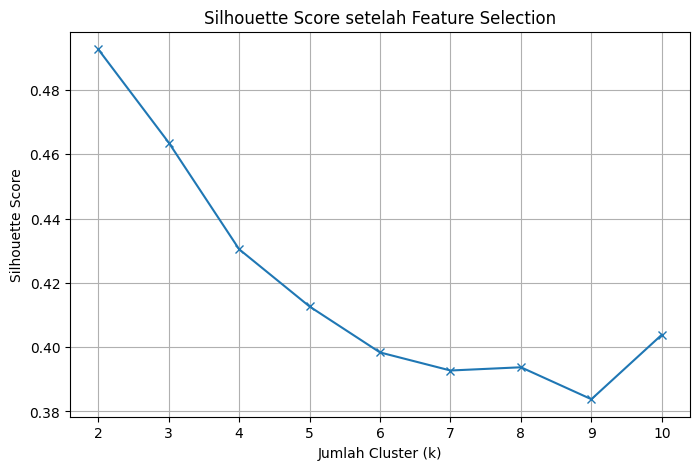

In [28]:
# Hitung Silhouette Score
silhouette_scores_selected = []
for k in range_k2:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_selected_scaled)
    silhouette_scores_selected.append(silhouette_score(df_selected_scaled, labels))

# Visualisasi Silhouette Score setelah Feature Selection
plt.figure(figsize=(8, 5))
plt.plot(range_k2, silhouette_scores_selected, marker='x')
plt.title('Silhouette Score setelah Feature Selection')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [29]:
# d. Visualisasi Hasil Clustering

# 1. PCA untuk mereduksi dimensi menjadi 2
pca = PCA(n_components=2)
components = pca.fit_transform(df_selected_scaled)  # Gunakan data yang sudah diproses sebelumnya

# Menambahkan hasil PCA ke dataframe
df_selected['PCA1'] = components[:, 0]
df_selected['PCA2'] = components[:, 1]

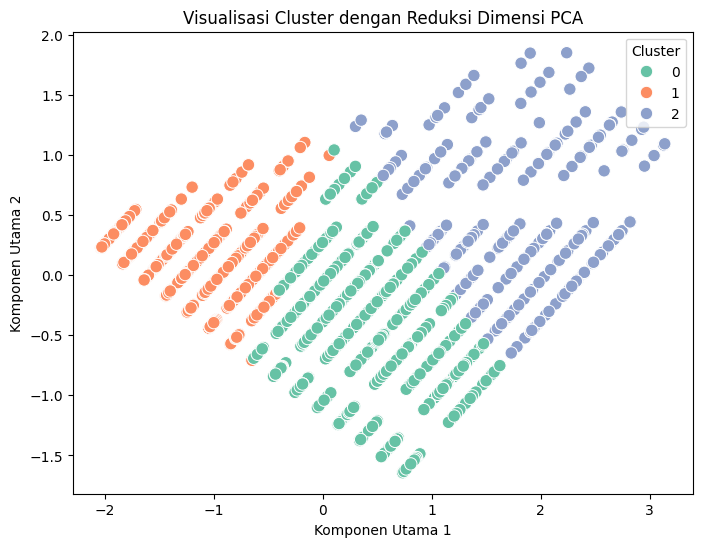

In [30]:
# 2. Visualisasi Clustering dengan PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_selected, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=80)
plt.title('Visualisasi Cluster dengan Reduksi Dimensi PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [31]:
# e. Analisis dan Interpretasi Hasil Cluster

# 1. Tambahkan Hasil Label Cluster ke DataFrame
# Menambahkan hasil clustering ke dalam DataFrame
df_selected['Cluster'] = kmeans_selected.labels_

In [32]:
# 2. Inverse Transform dari semua feature yang telah dinormalisasi
# Gunakan seluruh kolom numerik untuk inverse transform
df_normalized = pd.DataFrame(df_selected_scaled, columns=['Quantity', 'Discount', 'Total_Price'])

In [33]:
# Lakukan inverse transform pada seluruh kolom numerik
df_normalized_inverse = scaler.inverse_transform(df_normalized)

In [34]:
# Membuat dataframe baru setelah inverse transform
df_normalized_inverse = pd.DataFrame(df_normalized_inverse, columns=['Quantity', 'Discount', 'Total_Price'])

In [35]:
# 3. Masukkan Hasil Inverse Transform ke dalam DataFrame Asli
df_original = df_selected.copy()
df_original[['Quantity', 'Discount', 'Total_Price']] = df_normalized_inverse[['Quantity', 'Discount', 'Total_Price']]

# Menampilkan data setelah inverse transform untuk interpretasi lebih lanjut
print(df_original.head())

    Order_ID  Customer_ID  Customer_Type  Product  Category  Quantity  \
10      1018          224              1       25         2       9.0   
20      1351         1437              1       42         3       5.0   
21      1351         1437              1       29         1      14.0   
22      1462         1036              1       13         1      12.0   
23      1462         1036              1       10         2       4.0   

    Discount  Total_Price  Region  Order_Date  Cluster      PCA1      PCA2  
10       0.0         5.22       1         809        0  0.350063 -0.701568  
20       0.0        11.30       0           8        2  1.383353 -0.331343  
21       0.0        19.74       0           8        0  0.056050  0.330548  
22       0.0        28.20      14         550        1 -1.673743  0.258418  
23       0.0         6.84      14         550        0  1.499605 -0.878156  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
# Menghitung rata-rata fitur untuk setiap cluster
for cluster in range(optimal_k):
    cluster_data = df_original[df_original['Cluster'] == cluster]

    # Menghitung rata-rata
    avg_quantity = cluster_data['Quantity'].mean()
    avg_discount = cluster_data['Discount'].mean()
    avg_total_price = cluster_data['Total_Price'].mean()

    print(f"Cluster {cluster}:")
    print(f"Rata-rata Quantity: {avg_quantity}")
    print(f"Rata-rata Discount: {avg_discount}")
    print(f"Rata-rata Total_Price: {avg_total_price}")

Cluster 0:
Rata-rata Quantity: 7.746166950596252
Rata-rata Discount: 0.0
Rata-rata Total_Price: 13.29465076660988
Cluster 1:
Rata-rata Quantity: 7.841692789968652
Rata-rata Discount: 0.0
Rata-rata Total_Price: 13.712915360501567
Cluster 2:
Rata-rata Quantity: 8.214285714285714
Rata-rata Discount: 0.0
Rata-rata Total_Price: 13.332329192546581


Hasil interpretasinya di sini.
1. Cluster 0: 25.0
2. Cluster 1: 45.0
3. Cluster 2: 10.0

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Quantity:** 7.75  
- **Rata-rata Discount:** 0.0
- **Rata-rata Total_Price:** 13.29
- **Analisis:** Cluster ini mencakup pelanggan yang cenderung membeli dalam jumlah moderat (Quantity). Meskipun tidak ada diskon yang diberikan (Discount = 0), mereka masih memiliki total harga yang relatif rendah. Pelanggan dalam cluster ini mungkin berfokus pada pembelian dengan jumlah yang standar dan tidak terlalu mengutamakan diskon.

## Cluster 1:
- **Rata-rata Quantity:** 7.84  
- **Rata-rata Discount:** 0.0  
- **Rata-rata Total_Price:** 13.71
- **Analisis:** Pelanggan dalam cluster ini sedikit lebih banyak membeli barang dibandingkan Cluster 0 (Quantity), namun tetap tidak menerima diskon (Discount = 0). Total harga yang dibayar juga sedikit lebih tinggi dibandingkan Cluster 0. Ini bisa menunjukkan bahwa pelanggan di cluster ini lebih sering membeli produk dengan harga standar, namun volume pembelian mereka sedikit lebih tinggi.

## Cluster 2:
- **Rata-rata Quantity:** 8.21
- **Rata-rata Discount:** 0.0   
- **Rata-rata Total_Price:** 13.33
- **Analisis:** Cluster ini berisi pelanggan dengan jumlah pembelian sedikit lebih banyak dibandingkan Cluster 1 (Quantity). Seperti cluster lainnya, tidak ada diskon yang diterima (Discount = 0), namun mereka memiliki total harga yang sedikit lebih rendah dibandingkan Cluster 1. Pelanggan di cluster ini cenderung membeli dalam jumlah lebih banyak dengan harga standar, meskipun tanpa insentif diskon.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [37]:
# 7. Mengekspor Data ke dalam CSV

# Menyimpan DataFrame hasil clustering ke file CSV
df_original.to_csv('hasil_clustering.csv', index=False)

print("Data berhasil disimpan ke 'hasil_clustering.csv'.")

Data berhasil disimpan ke 'hasil_clustering.csv'.
